# Python Machine Learning Modules: 

* Python provides many bindings for machine learning libraries, some specialized for technologies such as neural networks, and others geared toward novice users. For our discussion, we focus on the powerful and popular Scikit-learn module. Scikit-learn is distinguished by its consistent and sensible API, its wealth of machine learning algorithms, its clear documentation, and its readily available datasets that make it easy to follow along with the online documentation. Like Pandas, Scikit-learn relies on Numpy for numerical arrays. Since its release in 2007, Scikit-learn has become the most widely used, general-purpose, open-source machine learning modules that is popular in both industry and academia. As with all of the Python modules we use, Scikit-learn is available on all the major platforms.

* We start with implementing linear regression using Scikit-learn

In [44]:
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

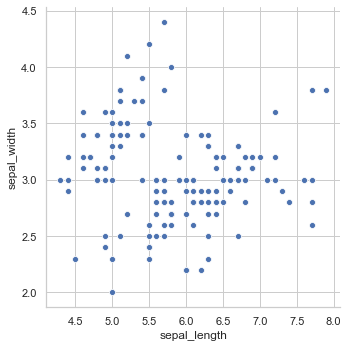

In [49]:
sns.set(style = 'whitegrid')
sns.relplot(x = 'sepal_length', y = 'sepal_width',
           data = iris);
pass

In [51]:
Xval = iris['sepal_length'].values.reshape((-1,1));
Yval = iris['sepal_width'].values.reshape((-1,1));

In [54]:
lr = LinearRegression();
lr.fit(Xval, Yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lr.coef_

array([[-0.0618848]])

In [56]:
lr.score(Xval, Yval)

0.013822654141080637

In [64]:
## We evalate the fit using predict method: 

xi = np.linspace(0,10,15); 
xi = xi.reshape((-1,1)); 
yp = lr.predict(xi)

In [65]:
yp

array([[3.41894684],
       [3.37474341],
       [3.33053998],
       [3.28633655],
       [3.24213313],
       [3.1979297 ],
       [3.15372627],
       [3.10952285],
       [3.06531942],
       [3.02111599],
       [2.97691256],
       [2.93270914],
       [2.88850571],
       [2.84430228],
       [2.80009886]])

# Multilinear Regression: 

* The Scikit-learn module easily extends linear regression to multiple dimensions.

$$
y = \alpha_0 + \alpha_1 x_1 + ... + \alpha_{n} x_{n}
$$

* The problem is to find all $\alpha_{i}'s$ given the training set $\{x_1, ..., x_{n}, y \}$

In [71]:
X = np.random.randint(20, size = (10,2)); 
Y = X.dot([1,3]) + 1 + np.random.rand(X.shape[0])*20;

In [72]:
lr = LinearRegression();
lr.fit(X,Y)
print(lr.coef_)

[0.466742   3.20436739]


# Polynomial Regression: 

* We can extend this to include polynomial regression by using the PolynomialFeatures in the preprocessing sub-module. To keep it simple, let’s go back to our one-dimensional example. First, let’s create some synthetic data,

In [105]:
X = np.random.normal(-10,2,size = 10);
eps = np.random.normal(0,1,size = 10);
Y = X + X**2 + X**3 + 20*eps; 

In [106]:
df = pd.DataFrame({'X': X, 'Y': Y, 'epsilon': eps})
df.head()

,X,Y,epsilon
0,-9.892540,-886.359666,-0.311111
1,-11.115779,-1263.000711,-0.098690
2,-10.270767,-1008.995313,-1.038191
3,-11.934857,-1583.217620,-0.685637
4,-13.794086,-2402.495514,2.285813


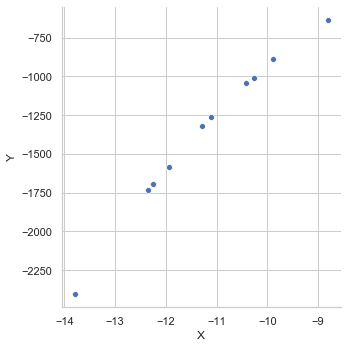

In [107]:
sns.relplot(x = "X", y = "Y", data = df);

In [108]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
cfit = PolynomialFeatures(degree = 2);
Xval = df['X'].values.reshape((-1,1));
Yval = df['Y'].values.reshape((-1,1));
Xc = cfit.fit_transform(Xval)

In [112]:
print(Xc)

[[  1.          -9.89254024  97.8623523 ]
 [  1.         -11.11577899 123.56054245]
 [  1.         -10.27076695 105.48865381]
 [  1.         -11.93485731 142.44081891]
 [  1.         -13.79408569 190.27680005]
 [  1.         -12.24849963 150.02574319]
 [  1.         -10.42010117 108.57850843]
 [  1.          -8.80407791  77.51178777]
 [  1.         -12.361924   152.81716509]
 [  1.         -11.29349292 127.54298229]]


In [113]:
cr = LinearRegression(); 
cr.fit(Xc, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print(cr.coef_)

[   0.         -337.4479445   -30.58600183]


# Boston dataset: 

In [130]:
from sklearn.datasets import *

In [131]:
boston = load_boston();
df_boston = pd.DataFrame(np.c_[boston['data'], 
                               boston['target']], 
                         columns = np.append(boston['feature_names'], 
                                             ['target']))


In [135]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [137]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

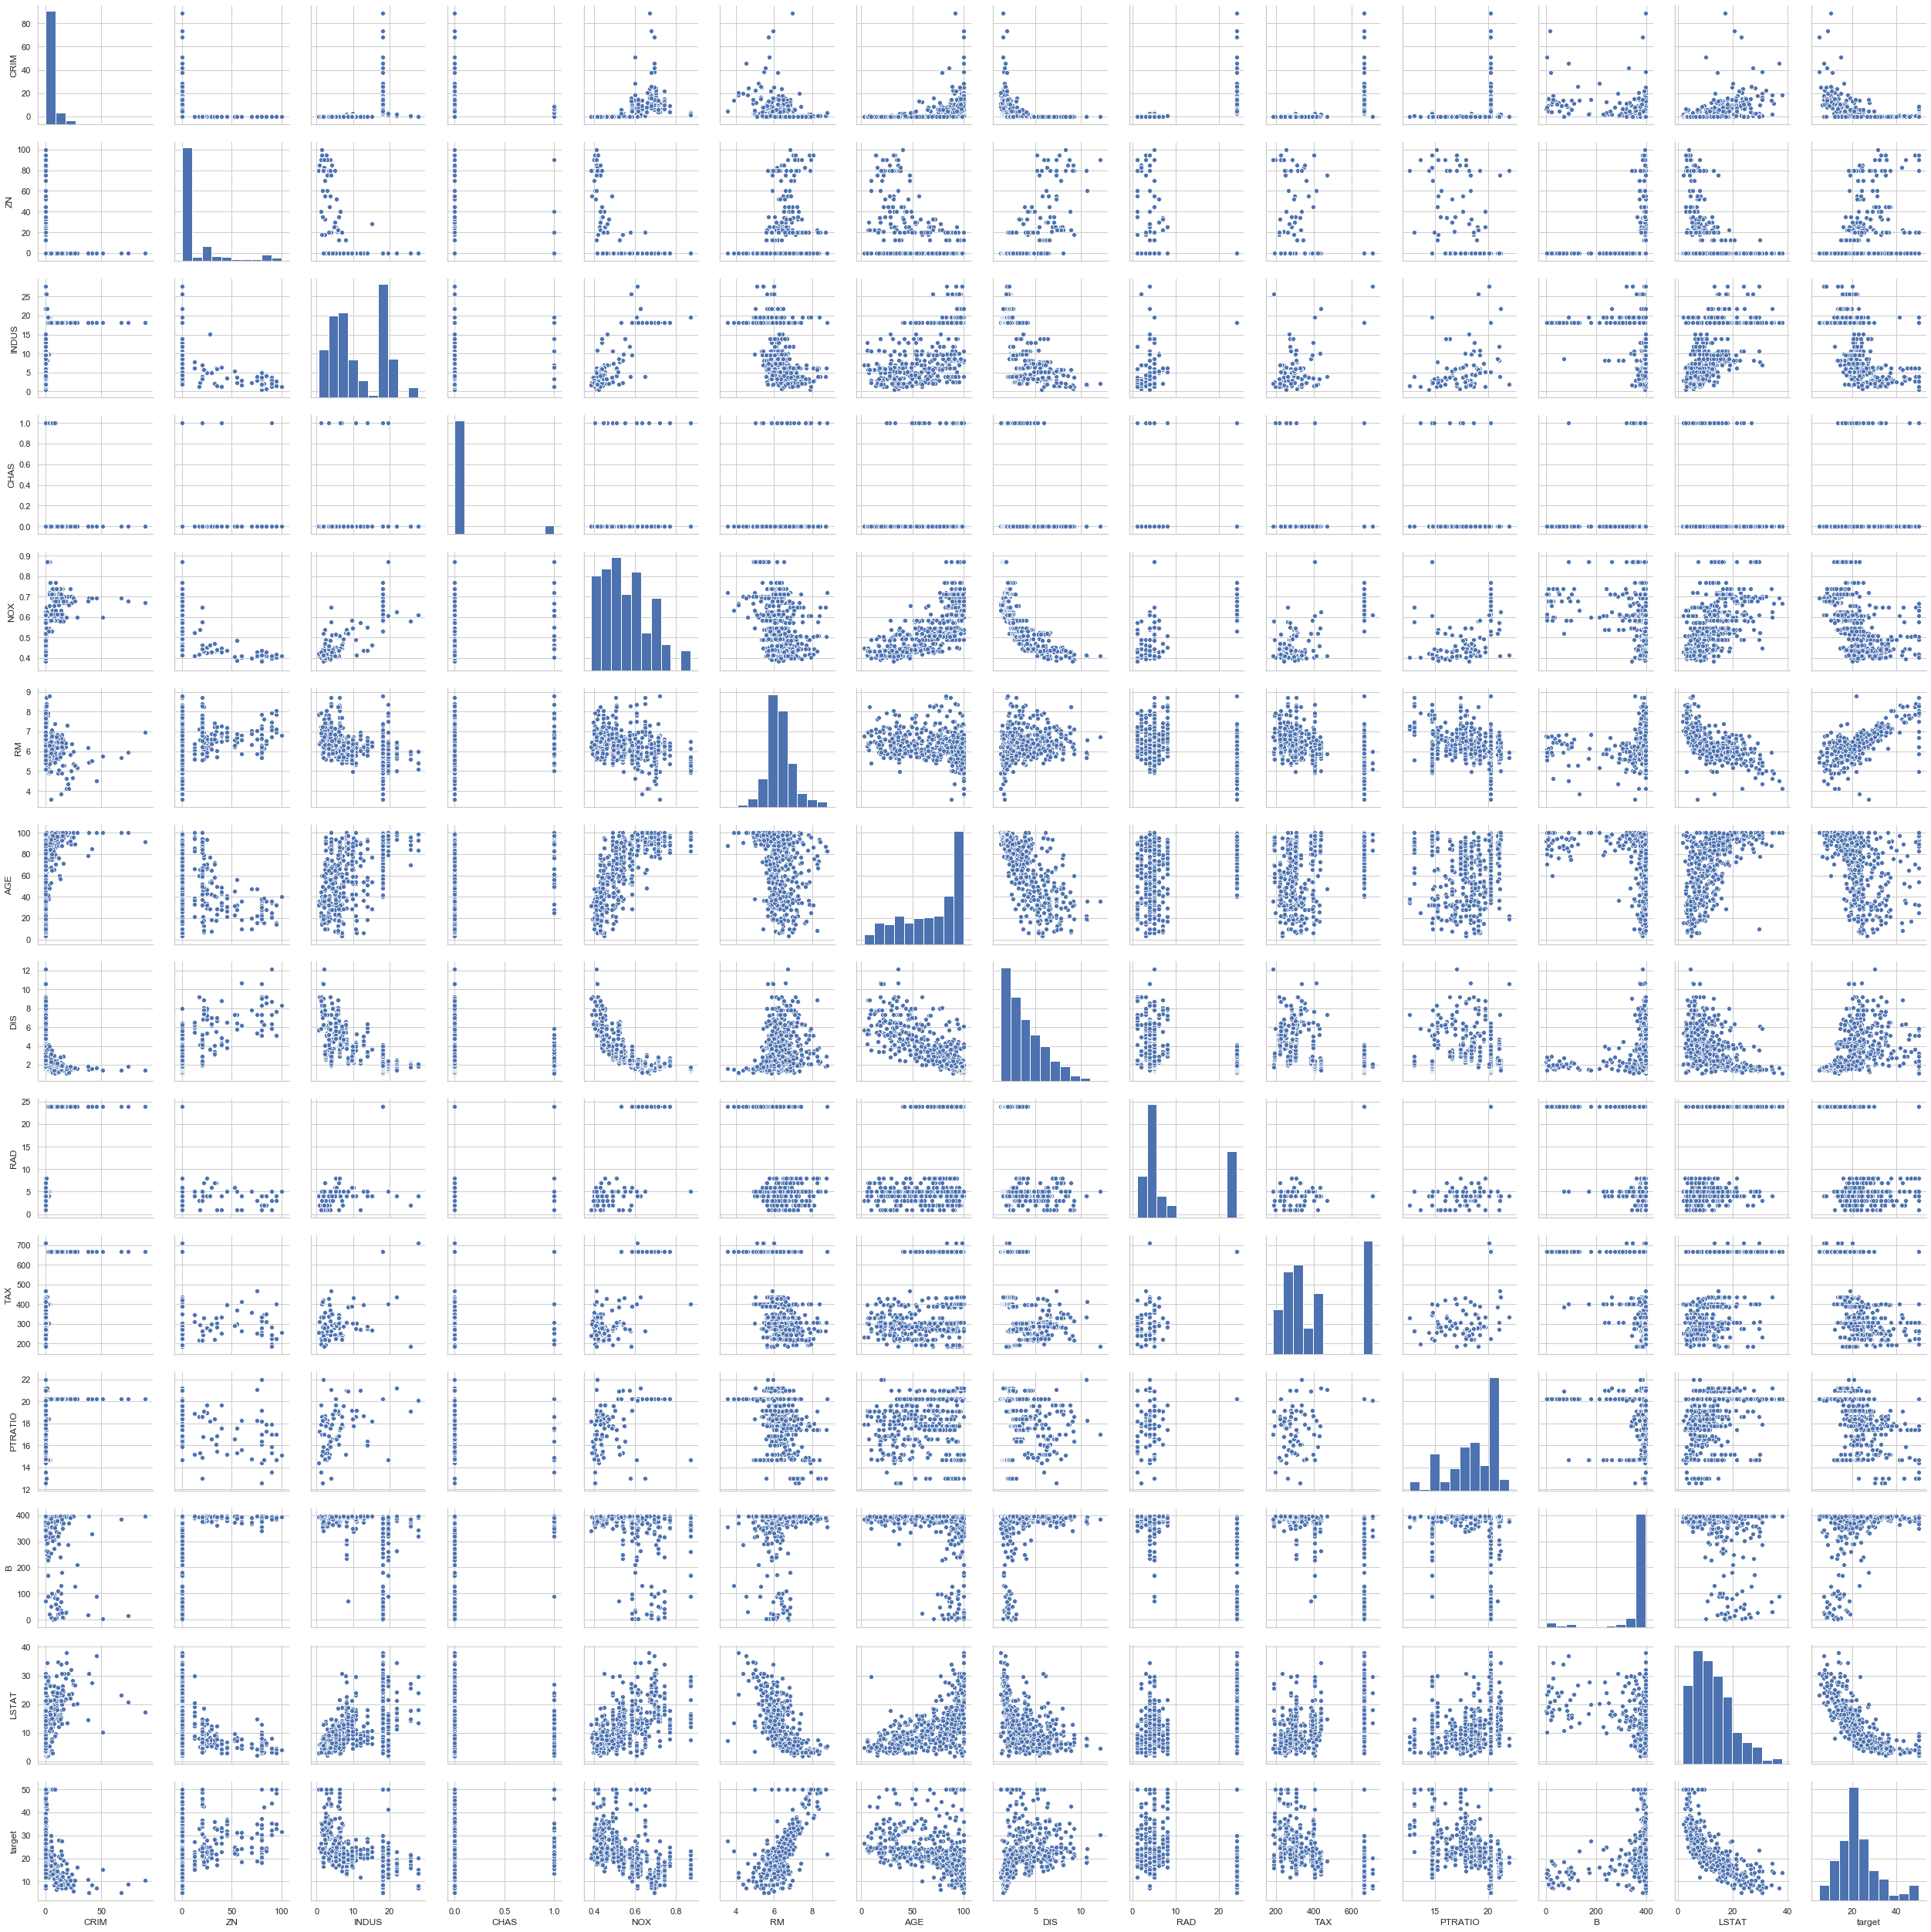

In [139]:
sns.pairplot(df_boston);

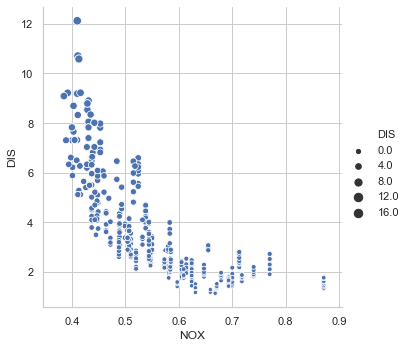

In [143]:
sns.relplot(x = 'NOX', y = 'DIS', 
            data = df_boston,
           size = 'DIS'); 
pass

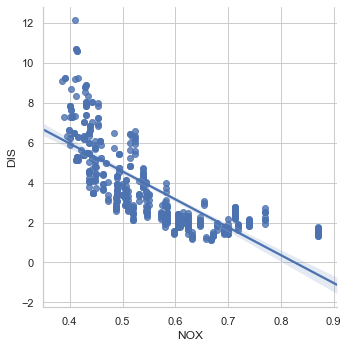

In [148]:
sns.lmplot(x = 'NOX', y = 'DIS', 
            data = df_boston, palette = "Set3");
pass

In [149]:
lr = LinearRegression();
Xvals = df_boston['NOX'].values.reshape((-1,1));
Yvals = df_boston['DIS'].values.reshape((-1,1));

lr.fit(Xvals, Yvals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
print(lr.coef_)

[[-13.97832352]]


In [157]:
from statsmodels.formula.api import ols

In [158]:
model = ols(formula = 'DIS ~ NOX', data = df_boston);

In [160]:
result = model.fit()

In [161]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              784.5
Date:                Sat, 30 May 2020   Prob (F-statistic):                   7.19e-105
Time:                        23:54:46   Log-Likelihood:                         -1223.4
No. Observations:                 506   AIC:                                      2449.
Df Residuals:                     505   BIC:                                      2453.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.9727      0.213     28.009      0.000       5.554       6.392
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.574
Skew:                           0.645   Prob(JB):                     1.14e-08
Kurtosis:                       2.729   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""